# Dataset Exploration & Distribution Analysis

Ce notebook permet d'explorer et visualiser la distribution des images dans le dataset de maladies des feuilles.

## 1. Imports

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

## 2. Formatage du Dataset

Extraction et organisation du dataset depuis `leaves.zip` en structure Apple/Grape.

In [ ]:
import zipfile
import shutil

def format_dataset():
    """
    Extrait leaves.zip et organise les sous-dossiers par classe (Apple/Grape).

    Structure initiale attendue dans leaves.zip:
    - images/
        - Apple_Black_rot/
        - Apple_Cedar_apple_rust/
        - Apple_healthy/
        - Apple_scab/
        - Grape_Black_rot/
        - Grape_Esca/
        - Grape_healthy/
        - Grape_spot/

    Structure finale:
    - Apple/
        - Apple_Black_rot/
        - Apple_Cedar_apple_rust/
        - Apple_healthy/
        - Apple_scab/
    - Grape/
        - Grape_Black_rot/
        - Grape_Esca/
        - Grape_healthy/
        - Grape_spot/
    """

    # 1. Extraire le fichier zip
    zip_path = "../leaves.zip"
    extract_to = "../"

    if not os.path.exists(zip_path):
        print(f"Le fichier {zip_path} n'existe pas")
        return

    print(f"Extraction de {zip_path}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(" Extraction terminée")

    # 2. Vérifier que le dossier images existe
    images_dir = "../images"
    if not os.path.exists(images_dir):
        print(f"Le dossier {images_dir} n'existe pas après extraction")
        return

    # 3. Créer les dossiers Apple et Grape
    apple_dir = "../Apple"
    grape_dir = "../Grape"

    os.makedirs(apple_dir, exist_ok=True)
    os.makedirs(grape_dir, exist_ok=True)
    print(f"Dossiers {apple_dir} et {grape_dir} créés")

    # 4. Déplacer les sous-dossiers dans leur classe correspondante
    moved_count = 0
    for subdir in os.listdir(images_dir):
        subdir_path = os.path.join(images_dir, subdir)

        if not os.path.isdir(subdir_path):
            continue

        # Déterminer la classe (Apple ou Grape)
        if subdir.startswith("Apple_"):
            destination = os.path.join(apple_dir, subdir)
            shutil.move(subdir_path, destination)
            print(f"  ➜ {subdir} → {apple_dir}/")
            moved_count += 1
        elif subdir.startswith("Grape_"):
            destination = os.path.join(grape_dir, subdir)
            shutil.move(subdir_path, destination)
            print(f"  ➜ {subdir} → {grape_dir}/")
            moved_count += 1
        else:
            print(f"Dossier ignoré: {subdir} (pas de classe reconnue)")

    # 5. Supprimer le dossier images vide
    if os.path.exists(images_dir) and not os.listdir(images_dir):
        os.rmdir(images_dir)
        print(f"Dossier {images_dir} supprimé (vide)")

    print(f"\n Formatage terminé! {moved_count} dossiers déplacés")
    print(f"  - Apple: {len(os.listdir(apple_dir))} catégories")
    print(f"  - Grape: {len(os.listdir(grape_dir))} catégories")

# Exécuter le formatage
format_dataset()

Extraction de ../leaves.zip...
 Extraction terminée
Dossiers ../Apple et ../Grape créés
  ➜ Grape_Black_rot → ../Grape/
  ➜ Apple_Black_rot → ../Apple/
  ➜ Apple_rust → ../Apple/
  ➜ Grape_healthy → ../Grape/
  ➜ Apple_scab → ../Apple/
  ➜ Apple_healthy → ../Apple/
  ➜ Grape_spot → ../Grape/
  ➜ Grape_Esca → ../Grape/
Dossier ../images supprimé (vide)

 Formatage terminé! 8 dossiers déplacés
  - Apple: 4 catégories
  - Grape: 4 catégories


## 2.1. Configuration

In [5]:
# Chemin vers le dataset
DATA_DIR = "../Grape"

# Vérifier que le dossier existe
if not os.path.exists(DATA_DIR):
    print(f"Le dossier {DATA_DIR} n'existe pas!")
else:
    print(f"Dossier trouvé: {DATA_DIR}")

Dossier trouvé: ../Grape


## 3. Analyse du Dataset

In [6]:
def analyze_dataset(directory):
    """
    Analyse le dataset et retourne les statistiques par plante et maladie.
    """
    plant_types = {}
    for subdir in os.listdir(directory):
        path = os.path.join(directory, subdir)
        if os.path.isdir(path):
            try:
                plant_type, disease = subdir.split('_', 1)
                if plant_type not in plant_types:
                    plant_types[plant_type] = {}
                num_images = len([
                    f for f in os.listdir(path)
                    if f.lower().endswith(('.jpg'))
                ])
                plant_types[plant_type][disease] = num_images
            except ValueError:
                print(f"Attention: Dossier ignoré '{subdir}'"
                      f"(format incorrect)")
    return plant_types

# Analyser le dataset
plant_types = analyze_dataset(DATA_DIR)

# Afficher les résultats
print("\n=== STATISTIQUES DU DATASET ===")
total_images = 0
for plant_type, diseases in plant_types.items():
    print(f"\n{plant_type}:")
    for disease, count in diseases.items():
        print(f"  - {disease}: {count} images")
        total_images += count
    print(f"  Total {plant_type}: {sum(diseases.values())} images")

print(f"\nTOTAL GÉNÉRAL: {total_images} images")


=== STATISTIQUES DU DATASET ===

Grape:
  - Black_rot: 1178 images
  - healthy: 422 images
  - spot: 1075 images
  - Esca: 1382 images
  Total Grape: 4057 images

TOTAL GÉNÉRAL: 4057 images


## 4. Visualisation de la Distribution

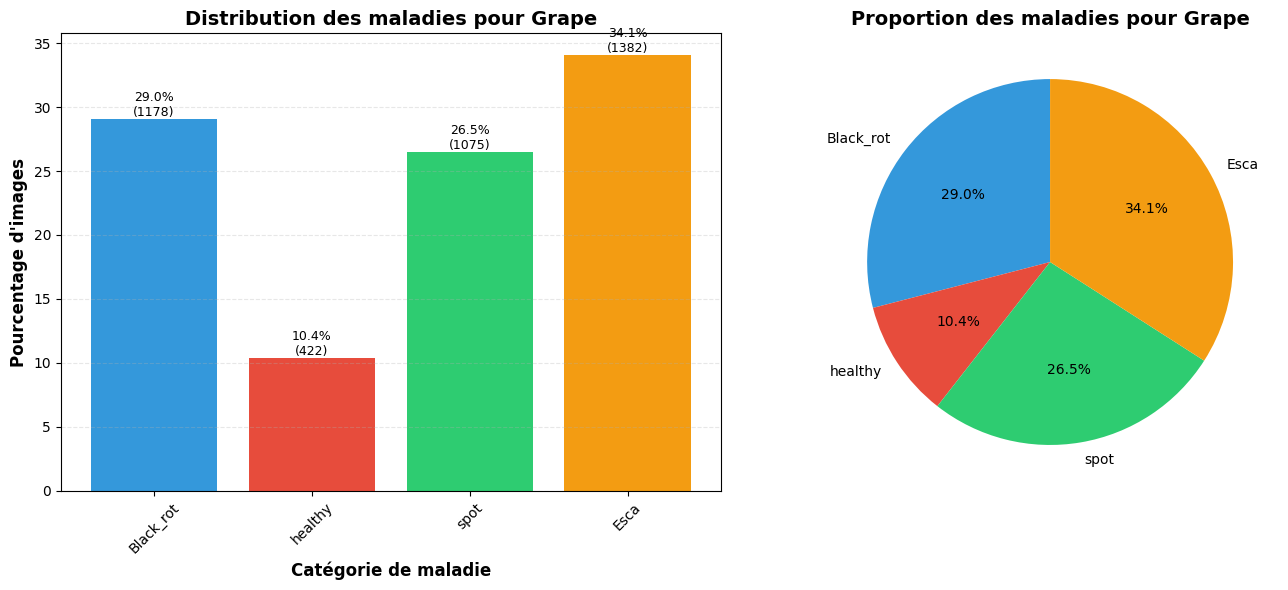

In [7]:
def plot_distribution(plant_type, disease_counts):
    """
    Affiche un bar chart et un pie chart pour la distribution des maladies.
    """
    labels, values = zip(*disease_counts.items())
    total_images = sum(values)
    proportions = [value / total_images * 100 for value in values]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Bar chart
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']
    bars = ax1.bar(labels, proportions, color=colors[:len(labels)])
    ax1.set_xlabel('Catégorie de maladie', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Pourcentage d\'images', fontsize=12, fontweight='bold')
    ax1.set_title(f'Distribution des maladies pour {plant_type}',
                  fontsize=14, fontweight='bold')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', alpha=0.3, linestyle='--')

    # Ajouter les valeurs sur les barres
    for bar, prop, val in zip(bars, proportions, values):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2., height,
                 f'{prop:.1f}%\n({val})',
                 ha='center', va='bottom', fontsize=9)

    # Pie chart
    ax2.pie(proportions, labels=labels, autopct='%1.1f%%',
            colors=colors[:len(labels)], startangle=90)
    ax2.set_title(f'Proportion des maladies pour {plant_type}',
                  fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Visualiser pour chaque type de plante
for plant_type, disease_counts in plant_types.items():
    plot_distribution(plant_type, disease_counts)

## 5. Analyse de l'Équilibrage

Vérifions si les classes sont équilibrées ou s'il faut appliquer une augmentation.

In [8]:
print("=== ANALYSE DE L'ÉQUILIBRAGE ===")

for plant_type, diseases in plant_types.items():
    counts = list(diseases.values())
    max_count = max(counts)
    min_count = min(counts)
    mean_count = np.mean(counts)
    std_count = np.std(counts)

    print(f"\n{plant_type}:")
    print(f"  Max: {max_count} images")
    print(f"  Min: {min_count} images")
    print(f"  Moyenne: {mean_count:.1f} images")
    print(f"  Écart-type: {std_count:.1f}")
    print(f"  Ratio max/min: {max_count/min_count:.2f}")

=== ANALYSE DE L'ÉQUILIBRAGE ===

Grape:
  Max: 1382 images
  Min: 422 images
  Moyenne: 1014.2 images
  Écart-type: 359.3
  Ratio max/min: 3.27


## 6. Visualisation d'Exemples d'Images

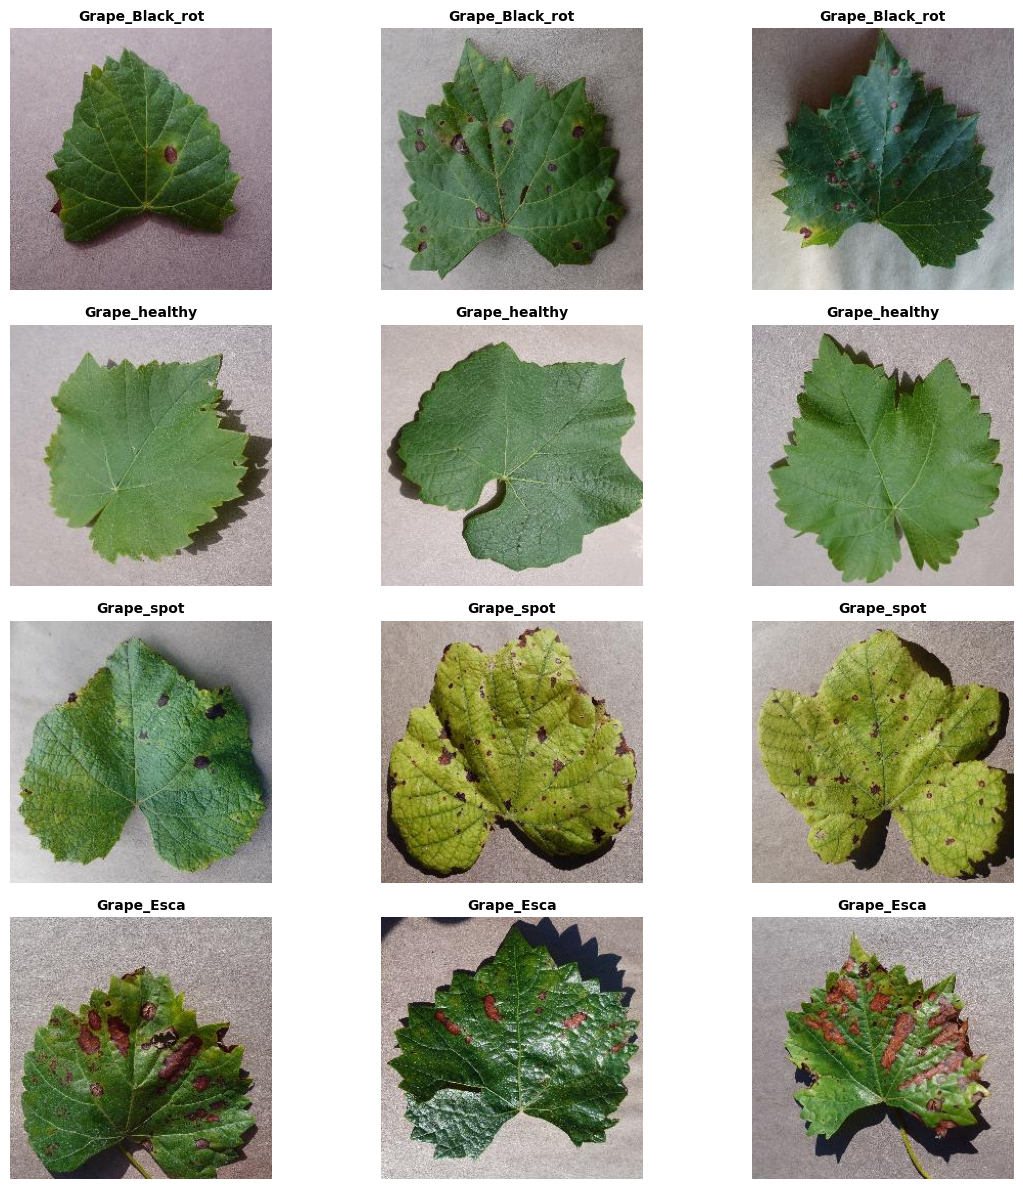

In [9]:
def display_sample_images(data_dir, num_samples=3):
    """
    Affiche des exemples d'images pour chaque catégorie.
    """
    categories = [d for d in os.listdir(data_dir)
                  if os.path.isdir(os.path.join(data_dir, d))]

    num_categories = len(categories)
    fig, axes = plt.subplots(num_categories, num_samples,
                             figsize=(num_samples*4, num_categories*3))

    if num_categories == 1:
        axes = [axes]

    for i, category in enumerate(categories):
        category_path = os.path.join(data_dir, category)
        images = [f for f in os.listdir(category_path)
                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        selected_images = random.sample(images, min(num_samples, len(images)))

        for j, img_name in enumerate(selected_images):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            ax = axes[i][j] if num_categories > 1 else axes[j]
            ax.imshow(img)
            ax.set_title(f"{category}", fontsize=10, fontweight='bold')
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Afficher des exemples
display_sample_images(DATA_DIR, num_samples=3)